   ID  Edad     Género Lugar de nacimiento provincia  \
0   1    21  Masculino                       Córdoba   
1   2    27   Femenino                      San Luis   
2   3    22   Femenino                       Córdoba   
3   4    22   Femenino                       Córdoba   
4   5    24   Femenino                       Córdoba   

  Lugar de residencia provincia  \
0                       Córdoba   
1                       Córdoba   
2                       Córdoba   
3                       Córdoba   
4                       Córdoba   

  Lugar de residencia (En formato: ciudad/provincia) Universidad  \
0                                    Córdoba/Córdoba         UNC   
1                                    Córdoba/Córdoba         UNC   
2                                    Córdoba/Córdoba         UNC   
3                                    Córdoba/Córdoba         UNC   
4                                    Córdoba/Córdoba         UNC   

                                      Facul

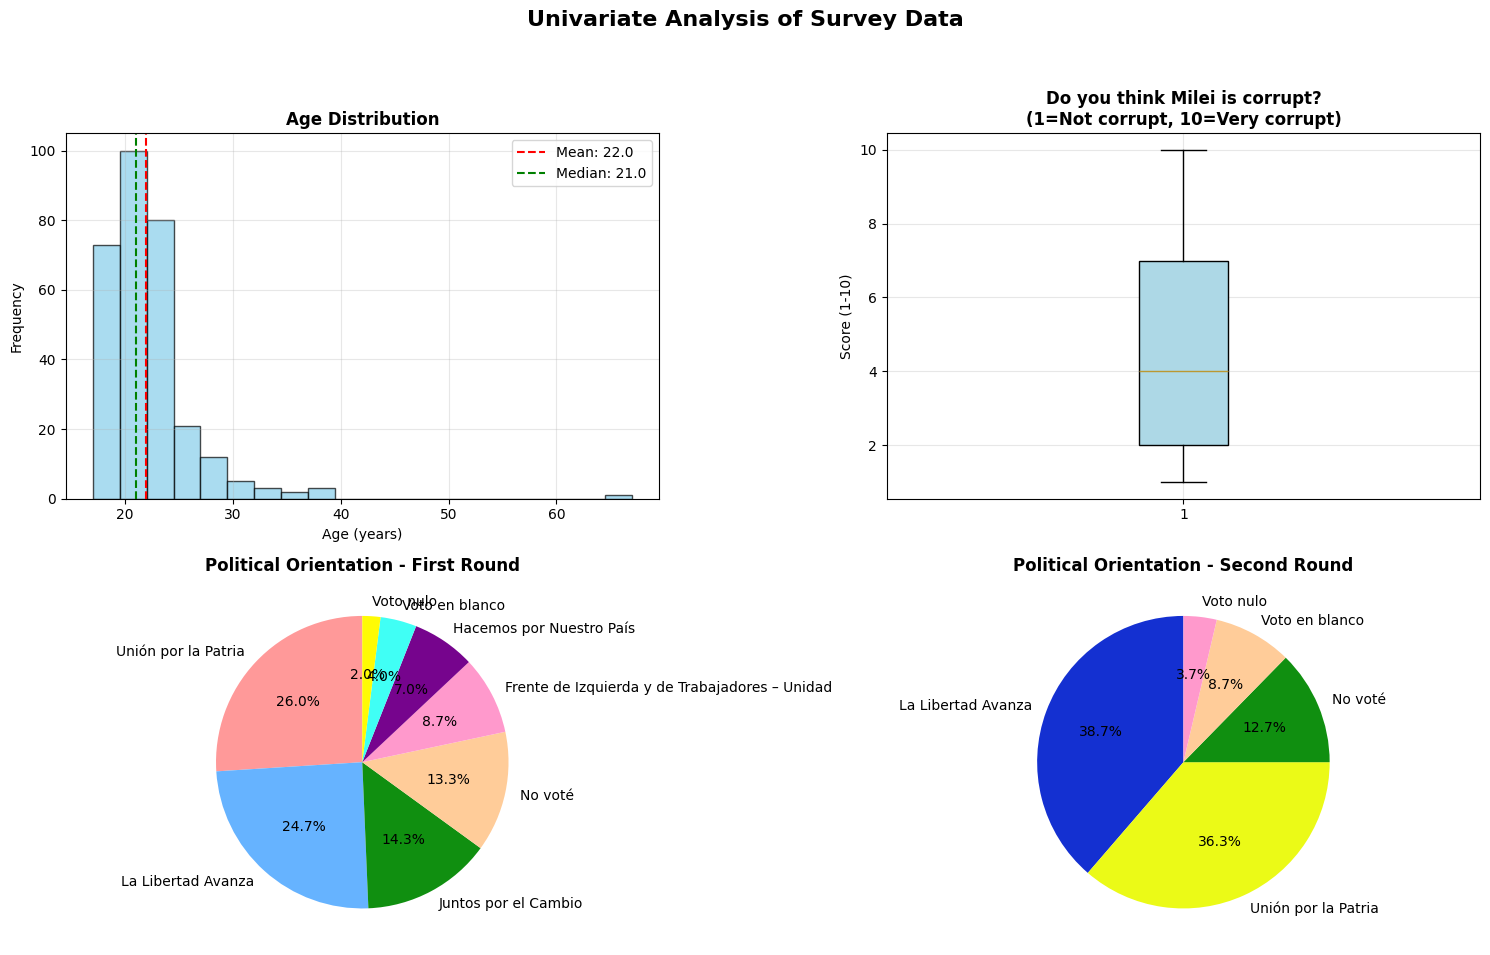

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the file / Create the dataframe
df = pd.read_excel("Auswertung.xlsx")
print(df.head())

# Descriptive Statistic
print("------Descriptive Statistic-------")

numerical_vars = ['Edad', '3. Buen político', '5. Ideas libertarias', 
                  '9. Resolver los problemas económicos', 
                  '11. Resolver los problemas de seguridad interior',
                  '12. Milei un político peligroso', '13. Corrupción', 
                  '14. Figura de autoridad fuerte', '16. Conocimientos económicos', 
                  '17. Perspectivas personales a futuro']

categorical_vars = ['Género', 'Lugar de nacimiento provincia', 
                    'Lugar de residencia provincia', 
                    'Lugar de residencia (En formato: ciudad/provincia)', 
                    'Universidad', 'Facultad (UNC)', 'Faculdad (UNLP)', 
                    'Faculdad (UBA)', '1. Primera vuelta', '2. Segunda vuelta', 
                    '4. Buena persona', '6. La mejor opción primera vuelta',
                    '7. La mejor opción segunda vuelta', '8. Oratoria', 
                    '10. Traerá más "libertad" a Argentina', 
                    '15. Sería mejor un gobierno peronista']

print("Numerical Variables Summary:")
print(df[numerical_vars].describe())

print("\nCategorical Variables Summary:")
for var in categorical_vars:
    print(f"\n{var.upper()}:")
    print(df[var].value_counts(normalize=True).round(3))

# Plotting style
plt.style.use('default')
sns.set_palette("husl")

# KORREKTUR: 2x2 Grid statt 3x3
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Univariate Analysis of Survey Data', fontsize=16, fontweight='bold')

# Plot 1: Age Distribution (Histogram with KDE)
axes[0, 0].hist(df['Edad'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df['Edad'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["Edad"].mean():.1f}')
axes[0, 0].axvline(df['Edad'].median(), color='green', linestyle='--', 
                   label=f'Median: {df["Edad"].median():.1f}')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution', fontweight='bold')  # HINZUGEFÜGT
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: 13. Corrupción (boxplot)
box_plot = axes[0, 1].boxplot(df['13. Corrupción'].dropna(), patch_artist=True)  # dropna() hinzugefügt
box_plot['boxes'][0].set_facecolor('lightblue')
axes[0, 1].set_title('Do you think Milei is corrupt?\n(1=Not corrupt, 10=Very corrupt)', 
                     fontweight='bold')  # Tippfehler korrigiert
axes[0, 1].set_ylabel('Score (1-10)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Political Orientation (Pie Chart) - First election round
primera_vuelta_counts = df['1. Primera vuelta'].value_counts()
colors_primera = ['#ff9999', '#66b3ff', '#108f10', '#ffcc99', 
                  '#ff99cc', '#76048d', '#40fff5', '#FFFB04']
wedges1, texts1, autotexts1 = axes[1, 0].pie(
    primera_vuelta_counts.values, 
    labels=primera_vuelta_counts.index,
    autopct='%1.1f%%',
    colors=colors_primera[:len(primera_vuelta_counts)],  # Nur benötigte Farben
    startangle=90
)
axes[1, 0].set_title('Political Orientation - First Round', fontweight='bold')

# Plot 4: Political Orientation (Pie Chart) - Second election round
segunda_vuelta_counts = df['2. Segunda vuelta'].value_counts()
colors_segunda = ['#1430d1', '#ebfa17', '#108f10', '#ffcc99', '#ff99cc']
wedges2, texts2, autotexts2 = axes[1, 1].pie(
    segunda_vuelta_counts.values, 
    labels=segunda_vuelta_counts.index,
    autopct='%1.1f%%',
    colors=colors_segunda[:len(segunda_vuelta_counts)],  # Nur benötigte Farben
    startangle=90
)
axes[1, 1].set_title('Political Orientation - Second Round', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("univariate_analysis.png", dpi=300, bbox_inches='tight')
print("Plot saved: univariate_analysis.png")

plt.show()

